In [17]:
# Import libraries

# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


In [18]:
# Load the cleaned data file

df=pd.read_csv('../data/education_clean.csv')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zipcode,school_type,school_level,charter_status
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


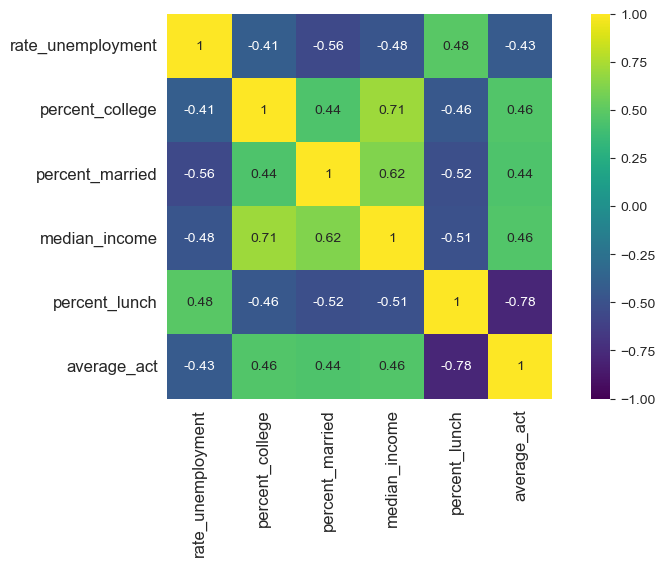

In [19]:
# Examine distributions and relationships
# Plot the correlation matrix of the numerical variables in the training data 
# to explore relationships between the variables.

predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter_status'
]

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    vmax=1, vmin=-1,
    square=True,
    annot=True,
    cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.show()


Observations:
average_act and unemployment rate have a negative correlation of -0.43. This could mean that schools in higher unemployment area could have lower average ACT.
average_act and percent_college have positive correlation of 0.46. This could mean that areas with higher percentage of college has higher ACT scores
average_act and percent_married have positive  correlation of 0.44.This could meam that areas with more married adults tend to have higher average ACT scores
average_act and median_income have positive  correlation of 0.46.This could meam that areas with higher income  tend to have higher average ACT scores
average_act and percent_lunch have strong negative correlation of -0.78. This could men that higher percentage of students with free lunch tend to have lower  average ACT.

This meansn that socioeconomic advantages like higher education, higher income,marriage is positiveley related to average ACT scores while socioeconomic disadvantages like unemployment and poverty leads to lower average ACT scores.

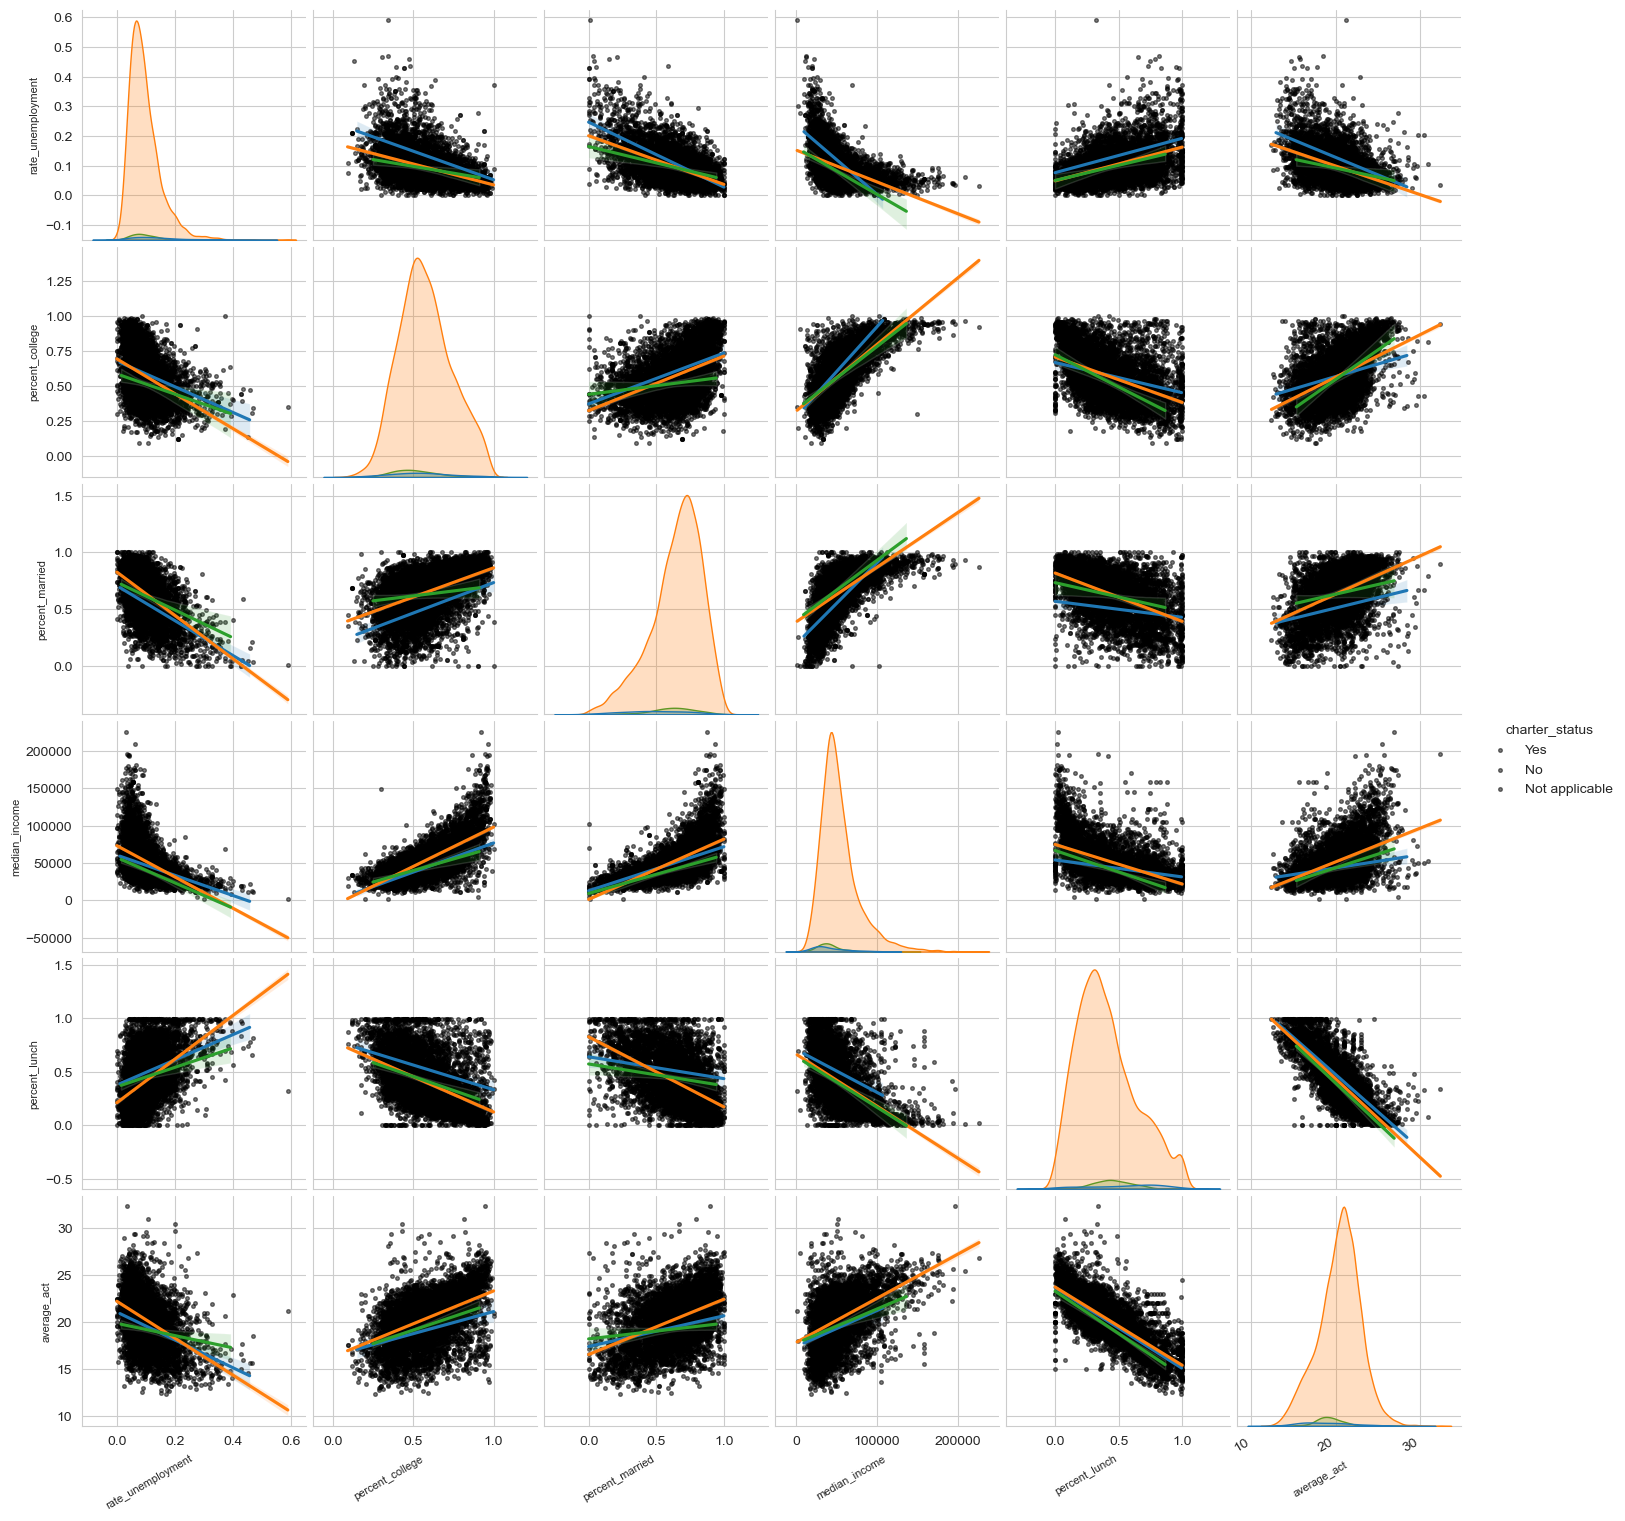

In [20]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter_status',
    kind='reg',
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}},
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()


Observations: 

The last row shows the relationship between average ACT scores to other socioeconomic factors. We can see negative slopes for unemployment rate and free lunch while positive relationship between average ACT score and higher eduction, marriage and higher income.

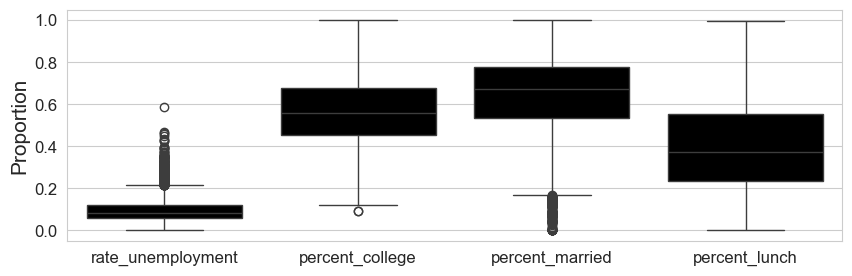

In [21]:
# Identify outliers
# We can use the interquartile range to identify outliers.
# Median income is on a different scale than other predictors, so we plot separately.

plt.figure(figsize=(10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()


Observations:

The boxplot  show us that the unemployment rate, percent college and percent married have outliers. However, the values do not seem so far away from the majority of the data, Nor do they seem like they are incorrect values so much that we would want to necessarily exclude them from our analysis.

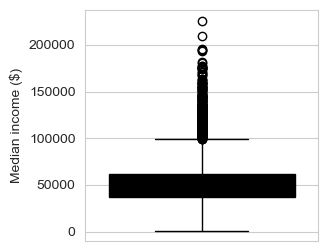

In [22]:
plt.figure(figsize=(3, 3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')
plt.show()


observation:

 We look at the boxplot for the median income. It has has outliers, which is typical of income distributions.These look like a correct data for median income.

Summary

The numerical predictors are related to average_act. The relationships appear roughly linear.

The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.

Some variables have skewed distributions, suggesting that transformations of input variables might be useful.

There are outliers in rate_unemployment, percent_college, percent_married, and median_income. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.

The relationships are similar across charter and non-charter schools, but might be significantly different.